In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Direct Random Weighted Graphs


In [4]:
# Setting the seed
np.random.seed(2060685 + 2139662 + 2139221)

### Random Weight
This class is responsible to manage the edge behaviour

In [5]:
class RandomWeight:
    def __init__(self, mean, standard_deviation):
        self.mean = mean
        self.standard_deviation = standard_deviation

    def __str__(self):
        return f"N({round(self.mean, 2)}, {round(self.standard_deviation**2, 2)})"

    def sample(self):
        return np.random.normal(loc = self.mean, scale = self.standard_deviation)

### DRWG
This class will represent our model

In [6]:
class DRWG:
    # Default values
    _N = 10
    _P = .3
    _MEAN_INTERVAL = (1, 5)
    _STD_INTERVAL = (2, 4)
    _SEED = 2060685 + 2139662 + 2139221
    _FIGSIZE = (10, 10)
    _WITH_LABELS = True
    _NODE_COLOR = "lightblue"
    _EDGE_COLOR = "gray"
    _NODE_SIZE = 500
    _FONT_SIZE = 10
    _ARROWSIZE = 20
    _FONT_COLOR = "red"

    def __init__(self, n = _N, p = _P, seed = _SEED):
        self.graph : nx.DiGraph = nx.fast_gnp_random_graph(n, p, seed, directed = True)
        for u, v in self.graph.edges():
            # Assegna direzione casuale: da u a v o da v a u
            random_mean = np.random.uniform(self._MEAN_INTERVAL[0], self._MEAN_INTERVAL[1])
            random_std = np.random.uniform(self._STD_INTERVAL[0], self._STD_INTERVAL[1])
            rw = RandomWeight(random_mean,random_std)
            self.graph[u][v]['label'] = rw.__str__()
            self.graph[u][v]['random_weight'] = rw

    def plot(self, figsize = _FIGSIZE, seed = _SEED, with_labels = _WITH_LABELS, node_color = _NODE_COLOR, edge_color = _EDGE_COLOR, node_size = _NODE_SIZE, font_size = _FONT_SIZE, font_color = _FONT_COLOR, arrowsize = _ARROWSIZE):
        # Draws the graph
        plt.figure(figsize = figsize)
        # Nodes position layout
        pos = nx.spring_layout(self.graph, seed)
        # Draws nodes and arcs
        nx.draw(self.graph, pos, with_labels = with_labels, node_color = node_color, edge_color = edge_color, node_size = node_size, font_size = font_size, arrowsize = arrowsize)

        # Disegna le etichette degli archi
        edge_labels = nx.get_edge_attributes(self.graph, 'label')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels = edge_labels, font_color = font_color, font_size = font_size)

        plt.title("Grafo")
        plt.show()


    def sample(self) -> nx.DiGraph:
        sample_graph = nx.DiGraph()
        for u, v in self.graph.edges():
            sample = self.graph.get_edge_data(u,v)["random_weight"].sample()
            sample_graph.add_edge(u, v, label=round(sample,2), random_weight= sample)

        return sample_graph

    def plot_graph(self, graph):
        # Draws the graph
        plt.figure(figsize = self._FIGSIZE)
        # Nodes position layout
        pos = nx.spring_layout(graph, self._SEED)
        # Draws nodes and arcs
        nx.draw(graph, pos, with_labels = self._WITH_LABELS, node_color = self._NODE_COLOR, edge_color = self._EDGE_COLOR, node_size = self._NODE_SIZE, font_size = self._FONT_SIZE, arrowsize = self._ARROWSIZE)

        # Disegna le etichette degli archi
        edge_labels = nx.get_edge_attributes(graph, 'label')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels = edge_labels, font_color = self._FONT_COLOR, font_size = self._FONT_SIZE)

        plt.title("Grafo")
        plt.show()

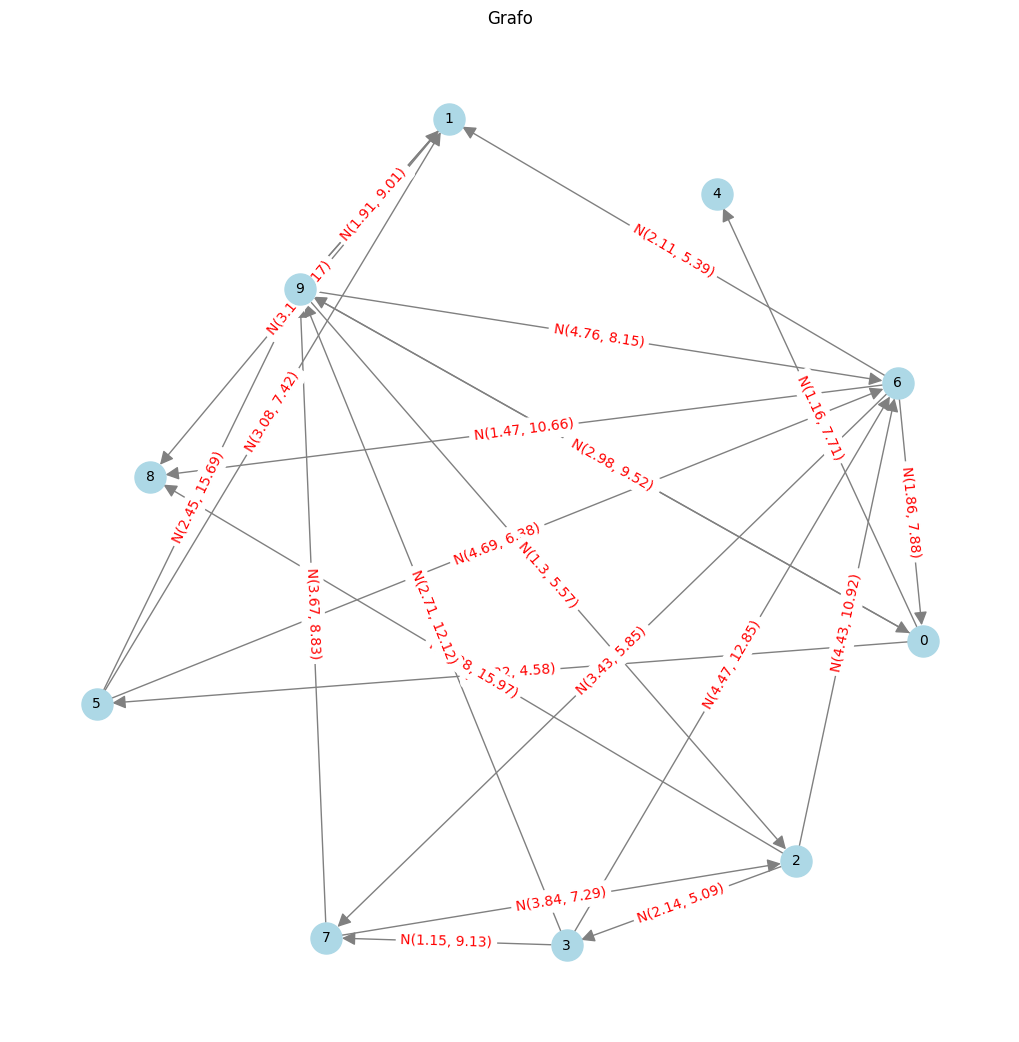

In [7]:
g1 = DRWG()
g1.plot()

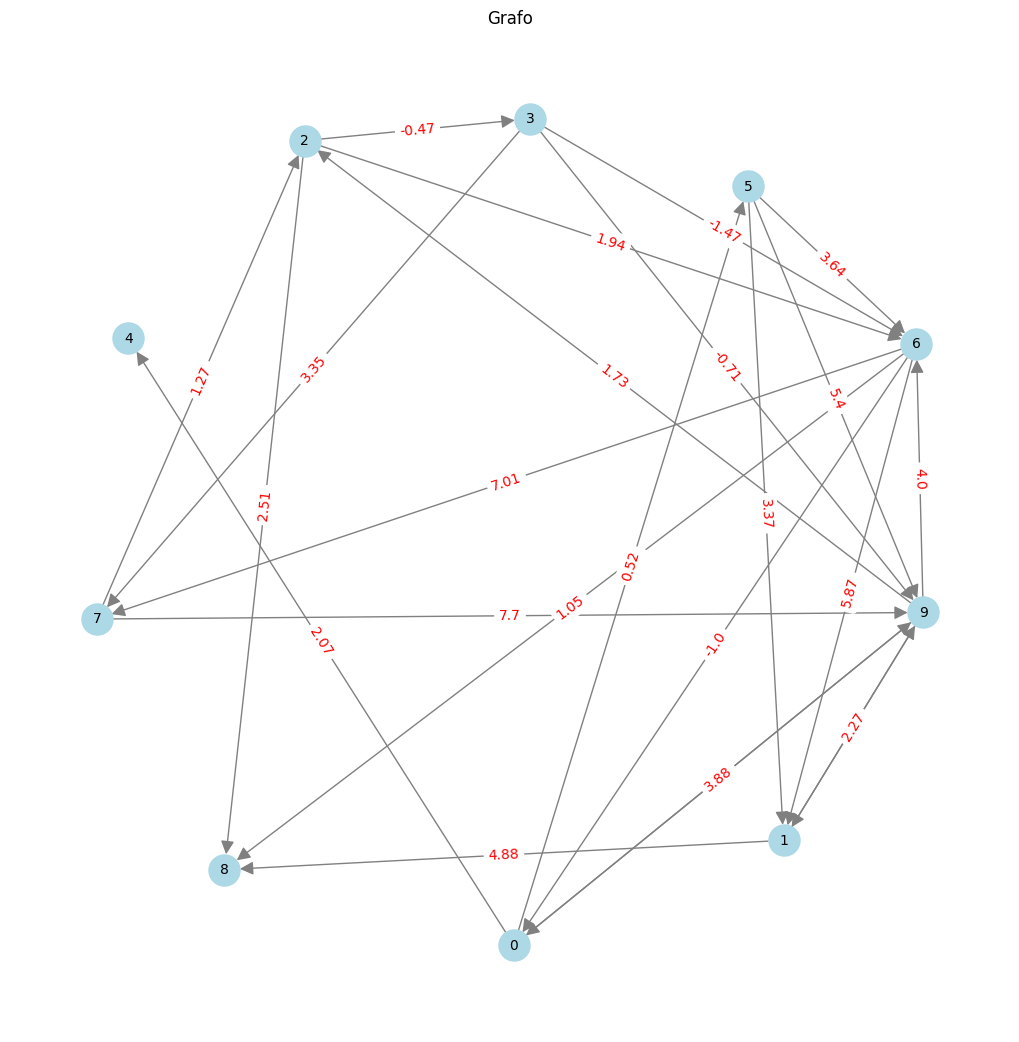

In [8]:
sample = g1.sample()
g1.plot_graph(sample)


## Random Weighted Degree

In un sample,

$ d_w^+(u) = \sum_{v \in \mathcal{N}(u)} w(u, v) $  
$ d_w^-(u) = \sum_{v \in \mathcal{N}(u)} w(v, u) $

dato che $ W(u, v) \sim \mathcal{N}(\mu_{(u, v)}, \sigma^2_{(u, v)}) $  
$ d_W^-(u) = \sum_{v \in \mathcal{N}(u)} W(v, u) \sim \mathcal{N}(\sum_{v \in \mathcal{N}(u)} \mu_{(v, u)}, \sigma^2_{(v, u)})$  

$P_r(d_W^-(u)\leq 5) = \Phi(5) $

$P_r(1 \leq d_W^-(u)\leq 5) = \Phi(5) -  \Phi(1)$

$d^+_w(G) = max(d_w^+(u))$

In [15]:
def sample_degree(n_samples):
  d_in_total = {}
  d_out_total = {}
  for v in g1.graph.nodes():
    d_in_total.update({v: 0})
    d_out_total.update({v: 0})


  for i in range(int(n_samples)):
    sample = g1.sample()
    in_degrees = sample.in_degree(weight='random_weight')
    out_degrees = sample.out_degree(weight='random_weight')
    for v in g1.graph.nodes():
      d_in_total[v] += in_degrees[v]
      d_out_total[v] += out_degrees[v] 

  for v in d_in_total:
    d_in_total[v] = d_in_total[v] / n_samples
    d_out_total[v] = d_out_total[v] / n_samples
    
  return (d_in_total, d_out_total)


In [17]:
sample_degree(100000)

({0: 4.833900209011762,
  1: 7.098380115097931,
  2: 5.1506616996150525,
  3: 2.1478687479600027,
  4: 1.1760264352665033,
  5: 3.20947833470553,
  6: 18.342095397554562,
  7: 4.564548926739207,
  8: 7.490808084539382,
  9: 13.722192136326777},
 {0: 8.033481483758354,
  1: 4.432268091177716,
  2: 9.438279800121581,
  3: 8.329802531193431,
  4: 0.0,
  5: 10.209899237840911,
  6: 8.852209171578739,
  7: 7.483692092271679,
  8: 0.0,
  9: 10.956327678874365})

[2.0000e+00 1.1130e+03 2.2240e+03 3.3350e+03 4.4460e+03 5.5570e+03
 6.6680e+03 7.7790e+03 8.8900e+03 1.0001e+04]
ITERATION -> 2
ITERATION -> 1113
ITERATION -> 2224
ITERATION -> 3335
ITERATION -> 4446
ITERATION -> 5557
ITERATION -> 6668
ITERATION -> 7779
ITERATION -> 8890
ITERATION -> 10001


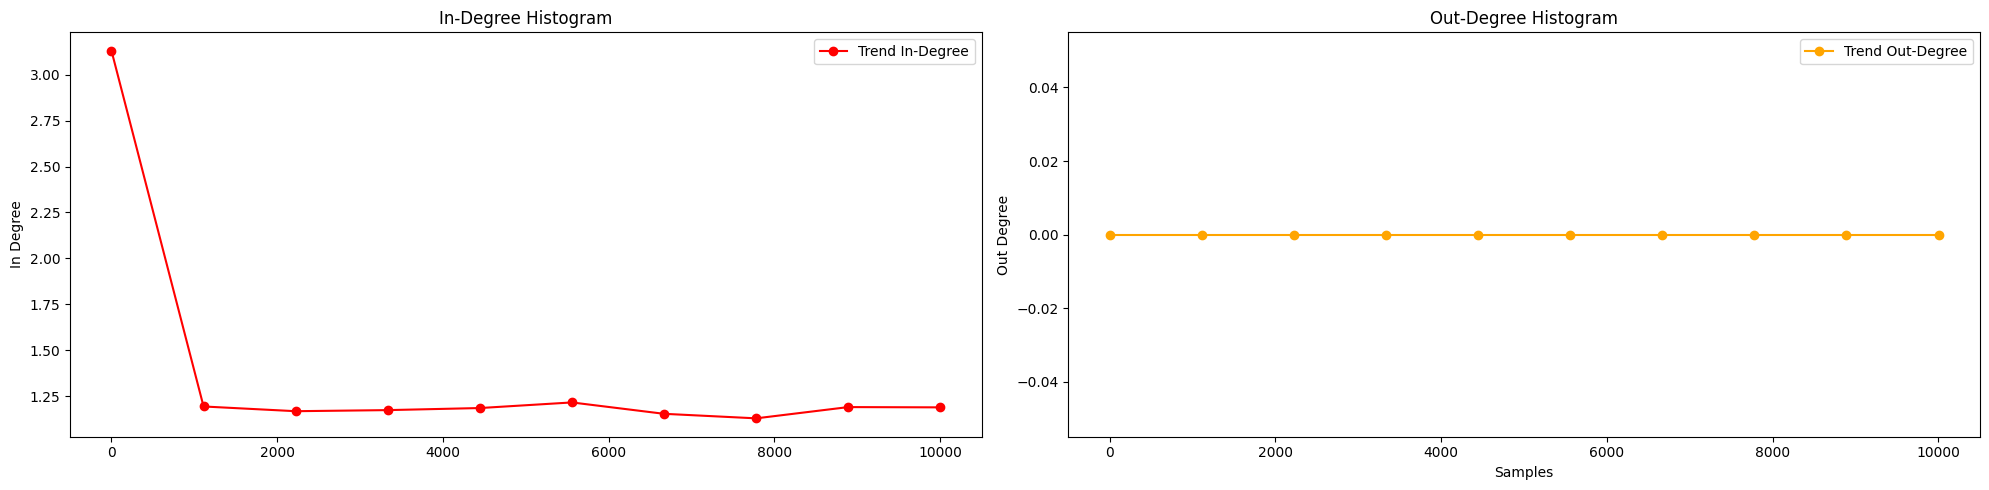

In [ ]:
analyzed_node = 4

min_iterations = 1
max_iterations = 10000
step = 10

in_degree_list = []
out_degree_list = []

iterations = [1] + np.linspace(min_iterations, max_iterations, num=step)
for k_iterations in iterations:
    print("N_SAMPLE ->", int(k_iterations))
    in_degrees, out_degrees = sample_degree(k_iterations)
    in_degree_list.append(in_degrees[analyzed_node])
    out_degree_list.append(out_degrees[analyzed_node])


# - Aggiungi linea di media teorica
fig, axs = plt.subplots(1, 2, figsize=(20, 5), sharex=True)
#axs[0].bar(iterations, in_degree_list, color='blue', alpha=0.7, label='In-Degree')
axs[0].plot(iterations, in_degree_list, color='red', marker='o', label='Trend In-Degree')
axs[0].set_title('In-Degree Histogram')
axs[0].set_ylabel('In Degree')
axs[0].legend()

#axs[1].bar(iterations, out_degree_list, color='green', alpha=0.7, label='Out-Degree')
axs[1].plot(iterations, out_degree_list, color='orange', marker='o', label='Trend Out-Degree')
axs[1].set_title('Out-Degree Histogram')
axs[1].set_xlabel('Samples')
axs[1].set_ylabel('Out Degree')
axs[1].legend()

plt.tight_layout()
plt.show()

In [38]:
# - Iterazioni che dipendono da formula di parpa ma in generale anche da grado non pesato e varianza totale
from math import ceil

in_edges = g1.graph.in_edges(analyzed_node, data=True)
overral_distribution = None

mean = sum(edge[2]['random_weight'].mean for edge in in_edges) 
std_dev = sum(edge[2]['random_weight'].standard_deviation for edge in in_edges) 

margin_error = 0.05
confidence_value = 1.96

K_NEEDED = ceil(((confidence_value * std_dev) / margin_error)**2)
print(K_NEEDED)
sample_degree(K_NEEDED)

11849


({0: 4.863779037164079,
  1: 7.022205012363572,
  2: 5.156545221983399,
  3: 2.167513938638388,
  4: 1.1662014303558155,
  5: 3.253947156571084,
  6: 18.302416579766227,
  7: 4.55752242913565,
  8: 7.577088322765739,
  9: 13.66056350534334},
 {0: 8.006808523065345,
  1: 4.422414719697935,
  2: 9.42054849369204,
  3: 8.379811590283508,
  4: 0.0,
  5: 10.180513666364536,
  6: 8.924854687459478,
  7: 7.500729272817886,
  8: 0.0,
  9: 10.892101680706649})